<a href="https://colab.research.google.com/github/alexvin364/steg/blob/master/Steg02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image
import os
N = 100
M = 2500
T = 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
im = imread('/content/drive/My Drive/Colab Notebooks/new_set/all/all/steg/3.png') 

colors = np.zeros((256, 256, 256))

for i in range(N):
  for j in range(N):
    c = im[i][j]
    colors[c[0]][c[1]][c[2]] = 1
im

In [0]:
def spam_extract(im, color):
  mask = np.zeros((N, N, 3))
  for i in range(N):
    for j in range(N-1):
      mask[i][j] += im[i][j] 
      mask[i][j] -= im[i][j+1]
  dim = T*2+1
  spam_feature = np.zeros((dim,dim))
  count_cond = np.zeros((dim,dim))
  for u in range(-T,T+1):
    for v in range(-T,T+1):
      for i in range(N):
        for j in range(N-1):
          if mask[i][j][color] == u:
            count_cond[u+T,v+T] += 1
            if mask[i][j+1][color] == v:
              spam_feature[u+T,v+T] += 1
  spam_feature /= count_cond
  spam_feature = spam_feature.reshape((1, dim*dim))[0]
  return spam_feature

In [0]:
def spam_extract_2nd(im, color):
  mask = np.zeros((N, N, 3))
  for i in range(N):
    for j in range(N-1):
      mask[i][j] += im[i][j] 
      mask[i][j] -= im[i][j+1]
  dim = T*2+1
  spam_feature = np.zeros((dim,dim,dim))
  count_cond = np.zeros((dim,dim,dim))
  for u in range(-T,T+1):
    for v in range(-T,T+1):
      for w in range(-T,T+1):
        for i in range(N):
          for j in range(N-2):
            if (mask[i][j][color] == v) and (mask[i][j+1][color] == w):
              count_cond[u+T,v+T,w+T] += 1
              if mask[i][j+2][color] == u:
                spam_feature[u+T,v+T,w+T] += 1
  spam_feature /= count_cond
  spam_feature = spam_feature.reshape((1, dim*dim*dim))[0]
  return spam_feature

In [0]:
im = imread('/content/drive/My Drive/Colab Notebooks/new_set/3kpics/steg/4.png') 
x = np.array([fn, 1, counts(im)])
x = np.concatenate((x, spam_extract_2nd(im, 0)))
x = np.concatenate((x, spam_extract_2nd(im, 1)))
x = np.concatenate((x, spam_extract_2nd(im, 2)))
x.size

In [0]:
def counts(im):
  colors = np.zeros((256, 256, 256))
  for i in range(N):
    for j in range(N):
      c = im[i][j]
      colors[c[0]][c[1]][c[2]] = 1
  s1 = colors[:][:][1:]
  s2 = colors[:][:][:255]
  s = np.sum(s1+s2 == 2)
  s1 = colors[:][1:][:]
  s2 = colors[:][:255][:]
  s += np.sum(s1+s2 == 2)
  s1 = colors[1:][:][:]
  s2 = colors[:255][:][:]
  s += np.sum(s1+s2 == 2)
  return s

In [0]:
import time
df = pd.DataFrame(columns=range( 3+3*(T*2+1)*(T*2+1)*(T*2+1)))
s=0
path = '/content/drive/My Drive/Colab Notebooks/new_set/3kpics/steg/'
for fn in os.listdir(path):
  im = imread(path+fn) 
  x = np.array([fn, 1, counts(im)])
  x = np.concatenate((x, spam_extract_2nd(im, 0)))
  x = np.concatenate((x, spam_extract_2nd(im, 1)))
  x = np.concatenate((x, spam_extract_2nd(im, 2)))
  df.loc[s] = x
  s+=1
path = '/content/drive/My Drive/Colab Notebooks/new_set/3kpics/clean/'
print('10% done')
print(time.ctime())
for fn in os.listdir(path):
  im = imread(path+fn)
  x = np.array([fn, 0, counts(im)])
  x = np.concatenate((x, spam_extract_2nd(im, 0)))
  x = np.concatenate((x, spam_extract_2nd(im, 1)))
  x = np.concatenate((x, spam_extract_2nd(im, 2)))
  df.loc[s] = x
  s+=1
df

In [0]:
df.to_csv('stegdata2634.csv')

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/new_set/3kpics/stegdata2634.csv')

In [38]:
from sklearn.utils import shuffle
df = shuffle(df)
#df = df.drop(columns=['Unnamed: 0'])
df = df.reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031
0,1966.png,1,4590,0.137931,0.113208,0.145455,0.051948,0.069767,0.052632,0.105263,0.095238,0.093023,0.030303,0.038835,0.048193,0.041667,0.041667,0.162162,0.036036,0.034483,0.030233,0.033333,0.033613,0.037500,0.024691,0.068182,0.013889,0.054321,0.028351,0.022222,0.027273,0.000000,0.105263,0.010714,0.054711,0.015873,0.031250,0.062500,0.074074,0.060606,...,0.056075,0.063158,0.027027,0.166667,0.000000,0.028571,0.085470,0.063636,0.100610,0.009050,0.106383,0.030769,0.097826,0.050000,0.057508,0.075061,0.014118,0.074380,0.017544,0.092308,0.040000,0.044118,0.021176,0.033898,0.016393,0.064516,0.058824,0.027778,0.049505,0.068182,0.022059,0.089286,0.000000,0.030303,0.000000,0.101266,0.009091,0.000000,0.090909,0.125000
1,1859.png,1,4902,0.000000,0.135135,0.058824,0.083333,0.000000,0.000000,0.111111,0.066667,0.034483,0.016949,0.069767,0.020833,0.111111,0.033333,0.050000,0.044118,0.071429,0.022727,0.131148,0.042553,0.095238,0.043478,0.068966,0.052632,0.029851,0.080645,0.033333,0.129032,0.074074,0.111111,0.000000,0.103448,0.068966,0.190476,0.000000,0.000000,0.142857,...,0.111111,0.105263,0.041667,0.120000,0.130435,0.000000,0.064516,0.021739,0.048780,0.000000,0.138889,0.000000,0.000000,0.137931,0.010989,0.059701,0.036585,0.062500,0.093750,0.115385,0.000000,0.030769,0.055556,0.030303,0.064516,0.142857,0.043478,0.000000,0.038462,0.029412,0.117647,0.205882,0.000000,0.000000,0.047619,0.066667,0.025641,0.000000,0.000000,0.000000
2,238.png,0,999,0.000000,0.060606,0.030303,0.000000,0.086957,0.000000,0.000000,0.032258,0.000000,0.053571,0.020408,0.037736,0.024390,0.000000,0.170732,0.081633,0.074627,0.053571,0.074627,0.050000,0.000000,0.000000,0.037736,0.070175,0.028986,0.020000,0.023256,0.076923,0.100000,0.106383,0.086957,0.000000,0.037037,0.076923,0.031250,0.033333,0.055556,...,0.209302,0.140351,0.128205,0.138889,0.095238,0.000000,0.052632,0.137255,0.085106,0.054545,0.156250,0.117647,0.000000,0.046512,0.073171,0.021277,0.090909,0.025000,0.026316,0.111111,0.000000,0.023810,0.080000,0.102041,0.216216,0.142857,0.000000,0.022727,0.025641,0.027778,0.081081,0.032258,0.125000,0.000000,0.000000,0.000000,0.000000,0.083333,0.027778,0.064516
3,1093.png,0,741,0.000000,0.083333,0.055556,0.111111,0.095238,0.000000,0.000000,0.062500,0.117647,0.129032,0.037037,0.000000,0.133333,0.050000,0.000000,0.000000,0.081081,0.000000,0.032258,0.040000,0.000000,0.000000,0.080000,0.028571,0.035714,0.043478,0.040000,0.050000,0.111111,0.000000,0.000000,0.052632,0.029412,0.045455,0.050000,0.111111,0.080000,...,0.136364,0.028571,0.095238,0.200000,0.000000,0.000000,0.074074,0.090909,0.078947,0.108108,0.000000,0.033333,0.000000,0.117647,0.058824,0.057143,0.043478,0.027027,0.200000,0.095238,0.040000,0.111111,0.121212,0.034483,0.138889,0.000000,0.000000,0.115385,0.074074,0.000000,0.052632,0.045455,0.120000,0.052632,0.045455,0.000000,0.068966,0.071429,0.066667,0.142857
4,522.png,0,717,0.170213,0.164179,0.107143,0.000000,0.000000,0.000000,0.000000,0.134146,0.121795,0.111888,0.072848,0.066667,0.000000,0.142857,0.077922,0.131250,0.106952,0.093750,0.015385,0.038462,0.066667,0.119403,0.047619,0.075145,0.032143,0.017241,0.014286,0.020000,0.080000,0.040816,0.050847,0.069231,0.023529,0.016949,0.078947,0.000000,0.031250,...,0.047619,0.078652,0.056604,0.050000,0.157895,0.084746,0.012500,0.039326,0.032407,0.064516,0.065934,0.073171,0.045455,0.033708,0.020408,0.035000,0.037736,0.027473,0.014085,0.027778,0.037736,0.056452,0.041152,0.039801,0.043210,0.054545,0.000000,0.025000,0.045872,0.034483,0.057803,0.046154,0.025000,0.000000,0.142857,0.027778,0.065789,0.045455,0.040816,0.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
df.replace('nan', np.nan, inplace=True)

In [0]:
df.fillna(0, inplace=True)

In [0]:
df.max()

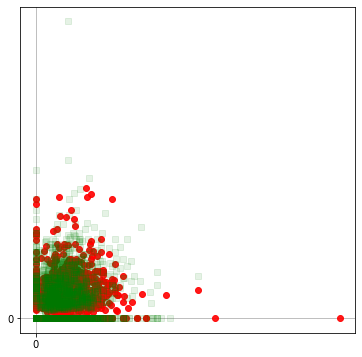

In [19]:
def graph(i,j):
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for k in range(len(df['1'])):
        if df['1'][k]!=1:
            x1.append(df[i][k])
            y1.append(df[j][k])
        else:
            x2.append(df[i][k])
            y2.append(df[j][k])
    plt.plot(x2, y2, "ro", alpha = 0.9)              #red - Steg
    plt.plot(x1, y1, "gs", alpha = 0.1)              #green - Legit
    plt.grid()

plt.figure(figsize=(6,6))
graph('19', '22')
plt.yticks(np.arange(0, 100, 100.0))
plt.xticks(np.arange(0, 100, 100.0))

plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': range(500,1000,100), 'max_depth': range(1,12)}

clf = RandomForestClassifier()
X = df.iloc[:M,2:]
y = df['1'][:M].values
X.transpose()
clf_grid = GridSearchCV(clf, params, cv=5)
clf_grid.fit(X, y)
clf_grid.best_params_
best_tree = clf_grid.best_estimator_
best_tree

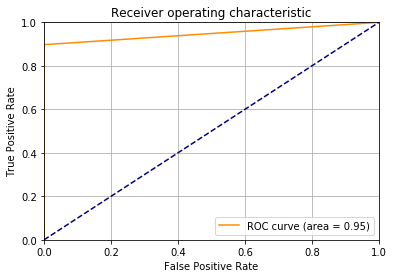

In [39]:
from sklearn.metrics import roc_curve, auc

X = df.iloc[:M,2:]
y = df['1'][:M].values
X.transpose()
P = df.iloc[M:,2:]
P = P.transpose()

best_tree = RandomForestClassifier(max_depth=5, n_estimators=1000)
best_tree.fit(X, y)  

#print(best_tree.feature_importances_)

dct = {}
df["res"] = df['1'].map(dct)

for i in range(M,len(df["res"])):
    p0 = best_tree.predict([P[i].tolist()])[0]
    df.loc[i, "res"] = p0

y = np.array(df['1'][M:])
x0 = np.array(df["res"][M:])
x0 = [int(item) for item in x0]
y = [int(item) for item in y]
y[1]=1
#print(x0,y)
fpr, tpr, thresholds = roc_curve(y,x0,pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()
df = df.drop("res", axis=1)